In [1]:
# 필요한 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 데이터 로드
gaap_path = [
    '../data/외감_2015_2023_GAAP.xlsx',
    '../data/외감_2015_2023_GAAP2.xlsx',
    '../data/외감_2015_2023_GAAP3.xlsx']
ifrs_c_path = [
    '../data/외감_2015_2023_연결IFRS.xlsx',
    '../data/외감_2015_2023_연결IFRS2.xlsx',
    '../data/외감_2015_2023_연결IFRS3.xlsx'
]
ifrs_path = [
    '../data/외감_2015_2023_IFRS.xlsx',
    '../data/외감_2015_2023_IFRS2.xlsx',
    '../data/외감_2015_2023_IFRS3.xlsx'
]

gaap = pd.DataFrame()
ifrs_c = pd.DataFrame()
ifrs = pd.DataFrame()

for path in gaap_path :
    df = pd.read_excel(path)
    gaap = pd.concat([gaap, df])

for path in ifrs_c_path :
    df = pd.read_excel(path)
    ifrs_c = pd.concat([ifrs_c, df])

for path in ifrs_path :
    df = pd.read_excel(path)
    ifrs = pd.concat([ifrs, df])

In [11]:
gaap = pd.read_csv('../data/외감_2015_2023_GAAP_all.csv')

In [12]:
x = gaap['종업원']
gaap.drop('종업원', axis=1,inplace=True)
gaap.insert(5, '종업원', x)
gaap.to_csv('../data/외감_2015_2023_GAAP_all.csv')

In [13]:
gaap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274439 entries, 0 to 274438
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   회사명                    274439 non-null  object 
 1   거래소코드                  274439 non-null  int64  
 2   회계년도                   274439 non-null  object 
 3   산업코드                   274439 non-null  int64  
 4   산업명                    274439 non-null  object 
 5   종업원                    274439 non-null  int64  
 6   자산(*)(천원)              274400 non-null  float64
 7   유동자산(*)(천원)            274400 non-null  float64
 8   비유동자산(*)(천원)           274400 non-null  float64
 9   유형자산(*)(천원)            274400 non-null  float64
 10  재고자산(*)(천원)            274400 non-null  float64
 11  매출채권(*)(천원)            274400 non-null  float64
 12  자본(*)(천원)              274400 non-null  float64
 13  자본금(*)(천원)             274400 non-null  float64
 14  자본잉여금(*)(천원)           274400 non-nu

In [ ]:
ifrs_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279439 entries, 0 to 82067
Data columns (total 43 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   회사명                                 279439 non-null  object 
 1   거래소코드                               279439 non-null  int64  
 2   회계년도                                279439 non-null  object 
 3   자산(*)(IFRS연결)(천원)                   6458 non-null    float64
 4   비유동자산(*)(IFRS연결)(천원)                6458 non-null    float64
 5   기타금융업자산(IFRS연결)(천원)                 6458 non-null    float64
 6   유동자산(*)(IFRS연결)(천원)                 6458 non-null    float64
 7   자본(*)(IFRS연결)(천원)                   6458 non-null    float64
 8   자본금(*)(IFRS연결)(천원)                  6458 non-null    float64
 9   자본잉여금(*)(IFRS연결)(천원)                6458 non-null    float64
 10  기타자본(*)(IFRS연결)(천원)                 6458 non-null    float64
 11  기타포괄손익누계액(*)(IFRS연결)(천원)        

In [ ]:
ifrs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279439 entries, 0 to 82067
Data columns (total 43 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   회사명                               279439 non-null  object 
 1   거래소코드                             279439 non-null  int64  
 2   회계년도                              279439 non-null  object 
 3   자산(*)(IFRS)(천원)                   24247 non-null   float64
 4   비유동자산(*)(IFRS)(천원)                24247 non-null   float64
 5   유형자산(*)(IFRS)(천원)                 24247 non-null   float64
 6   기타금융업자산(IFRS)(천원)                 24247 non-null   float64
 7   유동자산(*)(IFRS)(천원)                 24247 non-null   float64
 8   재고자산(*)(IFRS)(천원)                 24247 non-null   float64
 9   매출채권(IFRS)(천원)                    24247 non-null   float64
 10  자본(*)(IFRS)(천원)                   24247 non-null   float64
 11  자본금(*)(IFRS)(천원)                  24247 non-null   float64

In [14]:
# 결측치 확인
gaap.isna().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
274434    0
274435    0
274436    0
274437    0
274438    0
Length: 274439, dtype: int64

In [ ]:
gaap.loc[gaap.isna().sum(axis=1) != 0 , '회사명'].unique()

array(['(주)대원플러스알앤씨제사차', '(주)에스에스아이케이', 'CJCGVVIETNAMHOLDINGSCO.,LTD',
       'CaptivisionInc.', '글로벌텍스프리(주)', '더엠리테일주식회사', '로스웰인터내셔널유한회사',
       '주식회사낙원종합건설', '주식회사신승빌딩', '주식회사에이치에스디앤씨', '(주)첨단엔프라', '참존생활건강주식회사',
       '컬러레이홀딩스', '케이만금세기차륜집단유한공사', '평산차업집단유한공사', '한미물류주식회사'],
      dtype=object)

In [ ]:
ifrs_c.loc[ifrs_c['회사명'] == '(주)대원플러스알앤씨제사차', : ]

,회사명,거래소코드,회계년도,자산(*)(IFRS연결)(천원),비유동자산(*)(IFRS연결)(천원),기타금융업자산(IFRS연결)(천원),유동자산(*)(IFRS연결)(천원),자본(*)(IFRS연결)(천원),자본금(*)(IFRS연결)(천원),자본잉여금(*)(IFRS연결)(천원),...,단기차입금(*)(IFRS연결)(천원),장기차입금(*)(IFRS연결)(천원),기초자본금(IFRS연결)(천원),기말자본금(*)(IFRS연결)(천원),유형자산(*)(IFRS연결)(천원),감가상각비(IFRS연결)(천원),산업코드,산업명,설립일,종업원
11437,(주)대원플러스알앤씨제사차,83836,2017/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,117201,기타금융업,2016/10/05,6
11438,(주)대원플러스알앤씨제사차,83836,2018/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,117201,기타금융업,2016/10/05,6
11439,(주)대원플러스알앤씨제사차,83836,2019/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,117201,기타금융업,2016/10/05,6
11440,(주)대원플러스알앤씨제사차,83836,2020/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,126801,부동산업,2016/10/05,6
11441,(주)대원플러스알앤씨제사차,83836,2020/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,126801,부동산업,2016/10/05,6
11442,(주)대원플러스알앤씨제사차,83836,2021/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,126801,부동산업,2016/10/05,6
11443,(주)대원플러스알앤씨제사차,83836,2022/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,126801,부동산업,2016/10/05,6
11444,(주)대원플러스알앤씨제사차,83836,2023/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,126801,부동산업,2016/10/05,6


In [ ]:
ifrs.loc[ifrs['회사명'] == '(주)대원플러스알앤씨제사차', : ]

,회사명,거래소코드,회계년도,자산(*)(IFRS)(천원),비유동자산(*)(IFRS)(천원),유형자산(*)(IFRS)(천원),기타금융업자산(IFRS)(천원),유동자산(*)(IFRS)(천원),재고자산(*)(IFRS)(천원),매출채권(IFRS)(천원),...,총포괄손익(IFRS)(천원),기말자본금(*)(IFRS)(천원),기초자본금(IFRS)(천원),영업활동으로 인한 현금흐름(간접법)(*)(IFRS)(천원),투자활동으로 인한 현금흐름(*)(IFRS)(천원),재무활동으로 인한 현금흐름(*)(IFRS)(천원),산업코드,산업명,종업원,설립일
11437,(주)대원플러스알앤씨제사차,83836,2017/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,117201,기타금융업,6,2016/10/05
11438,(주)대원플러스알앤씨제사차,83836,2018/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,117201,기타금융업,6,2016/10/05
11439,(주)대원플러스알앤씨제사차,83836,2019/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,117201,기타금융업,6,2016/10/05
11440,(주)대원플러스알앤씨제사차,83836,2020/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,126801,부동산업,6,2016/10/05
11441,(주)대원플러스알앤씨제사차,83836,2020/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,126801,부동산업,6,2016/10/05
11442,(주)대원플러스알앤씨제사차,83836,2021/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,126801,부동산업,6,2016/10/05
11443,(주)대원플러스알앤씨제사차,83836,2022/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,126801,부동산업,6,2016/10/05
11444,(주)대원플러스알앤씨제사차,83836,2023/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,126801,부동산업,6,2016/10/05


- 연결 IFRS, IFRS 결측치 대다수
- GAAP 결측치는 연결 IFRS, IFRS에도 결측치로 보임
- 비상장외감기업은 GAAP를 기준으로 삼기로 함
- GAAP 결측치 소수, 결측치가 있는 경우는 인덱스가 전부 결측치
- 결측치가 있는 인덱스 삭제

In [15]:
# 결측치 제거
gaap = gaap.loc[gaap.isna().sum(axis=1) == 0 ,  : ]

In [16]:
gaap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274400 entries, 0 to 274438
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   회사명                    274400 non-null  object 
 1   거래소코드                  274400 non-null  int64  
 2   회계년도                   274400 non-null  object 
 3   산업코드                   274400 non-null  int64  
 4   산업명                    274400 non-null  object 
 5   종업원                    274400 non-null  int64  
 6   자산(*)(천원)              274400 non-null  float64
 7   유동자산(*)(천원)            274400 non-null  float64
 8   비유동자산(*)(천원)           274400 non-null  float64
 9   유형자산(*)(천원)            274400 non-null  float64
 10  재고자산(*)(천원)            274400 non-null  float64
 11  매출채권(*)(천원)            274400 non-null  float64
 12  자본(*)(천원)              274400 non-null  float64
 13  자본금(*)(천원)             274400 non-null  float64
 14  자본잉여금(*)(천원)           274400 non-null  f

In [17]:
# 컬럼명 정리
gaap.columns = gaap.columns.str.replace('(*)', '')
gaap.columns = gaap.columns.str.replace('(천원)', '')

In [18]:
# 회계년도 12월 데이터만 남김
gaap = gaap.loc[gaap['회계년도'].map(lambda x : x.split('/')[-1]) == '12', : ]

In [19]:
# 금액 단위 통일
gaap.iloc[ : , 6 : ] = gaap.iloc[ :, 6 : ] * 1000

In [20]:
# 차입금 컬럼 생성
gaap['차입금'] = gaap['단기차입금'] + gaap['장기차입금']

In [21]:
# 차입금 10억 이상 기업 확인
print(f'총 인덱스 수 : {len(gaap)}')
print(f'총 기업 수 : {len(gaap["거래소코드"].unique())}')
print(f'차입금 10억 이상 인덱스 수 : {len(gaap.loc[gaap["차입금"] >= 10**9, : ])}')
print(f'차입금 10억 이상 기업 수 : {len(gaap.loc[gaap["차입금"] >= 10**9, "거래소코드"].unique())}')

총 인덱스 수 : 272644
총 기업 수 : 55568
차입금 10억 이상 인덱스 수 : 211231
차입금 10억 이상 기업 수 : 47727


In [22]:
# 차입금 10억 이상 인덱스만 남김
gaap = gaap.loc[gaap['차입금'] >= 10**9, : ]

In [23]:
# 데이터 기초통계량 확인
gaap.describe()

,거래소코드,산업코드,종업원,자산,유동자산,비유동자산,유형자산,재고자산,매출채권,자본,...,영업외비용,법인세비용차감전(계속사업)손익,(계속사업손익)법인세비용,당기순이익(순손실),기초자본금,영업활동으로 인한 현금흐름,투자활동으로 인한 현금흐름,재무활동으로 인한 현금흐름,이자비용,차입금
count,211231.000000,211231.000000,211231.000000,2.112310e+05,2.112310e+05,2.112310e+05,2.112310e+05,2.112310e+05,2.112310e+05,2.112310e+05,...,2.112310e+05,2.112310e+05,2.112310e+05,2.112310e+05,2.112310e+05,2.112310e+05,2.112310e+05,2.112310e+05,2.112310e+05,2.112310e+05
mean,69384.788478,73746.098324,69.684180,7.250573e+10,2.795462e+10,4.405430e+10,2.837499e+10,1.019730e+10,7.176241e+09,2.520680e+10,...,2.761526e+09,1.689624e+09,5.209337e+08,1.179315e+09,4.783298e+09,1.933111e+09,-4.653225e+09,3.135565e+09,1.142610e+09,2.359351e+10
std,26005.067549,43950.859499,346.377823,6.535632e+11,2.283455e+11,4.778002e+11,3.911452e+11,8.424634e+10,5.222380e+10,3.811678e+11,...,3.182104e+10,4.032793e+10,7.852050e+09,3.486824e+10,4.189206e+10,6.258294e+10,6.180563e+10,4.153926e+10,6.544624e+09,8.806568e+10
min,10000.000000,10100.000000,0.000000,-4.061700e+07,-4.688600e+07,-1.964740e+08,-4.939030e+08,-3.006420e+08,-2.461890e+08,-3.024280e+12,...,-6.549059e+09,-2.097215e+12,-9.734610e+11,-1.626206e+12,0.000000e+00,-1.352057e+12,-9.223699e+12,-2.041120e+12,-3.297000e+07,1.000000e+09
25%,52225.500000,32602.000000,2.000000,1.419419e+10,3.723413e+09,5.503946e+09,1.388742e+09,5.265000e+05,6.810600e+07,1.407715e+09,...,2.568650e+08,-4.712040e+08,0.000000e+00,-4.838260e+08,3.000000e+08,-7.202645e+08,-2.797734e+09,-8.734640e+08,1.536835e+08,4.965360e+09
50%,72798.000000,64102.000000,20.000000,2.206643e+10,8.848391e+09,1.149192e+10,8.136405e+09,1.323608e+09,1.552948e+09,5.614097e+09,...,5.341360e+08,2.670940e+08,1.638900e+07,2.216890e+08,7.000000e+08,4.458230e+08,-5.257450e+08,1.650000e+08,3.200340e+08,8.972414e+09
75%,89115.000000,126801.000000,61.000000,4.363958e+10,1.906705e+10,2.304620e+10,1.646518e+10,5.858915e+09,4.832730e+09,1.399460e+10,...,1.332632e+09,1.531234e+09,2.378315e+08,1.282396e+09,2.000000e+09,2.216226e+09,0.000000e+00,2.850244e+09,7.130460e+08,1.793617e+10
max,116714.000000,209801.000000,32969.000000,7.053502e+13,3.709545e+13,6.035720e+13,5.605449e+13,7.723361e+12,6.123872e+12,5.806236e+13,...,4.447249e+12,8.850382e+12,1.056607e+12,8.268314e+12,5.278669e+12,1.038106e+13,2.273928e+12,5.521992e+12,6.877428e+11,5.809647e+12


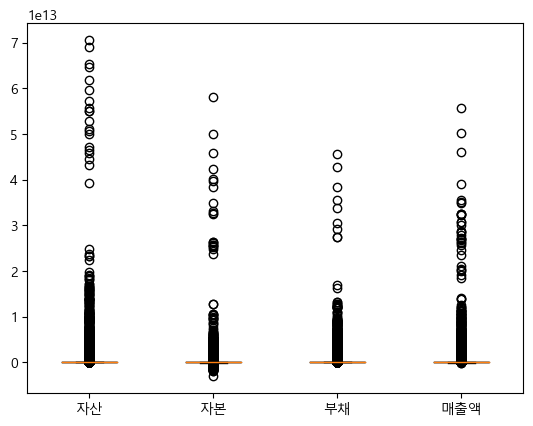

In [24]:
plt.rc('font', family = 'Malgun Gothic')
plt.boxplot([gaap['자산'], gaap['자본'], gaap['부채'], gaap['매출액(영업수익)']], labels = ['자산', '자본', '부채', '매출액'])
plt.show()

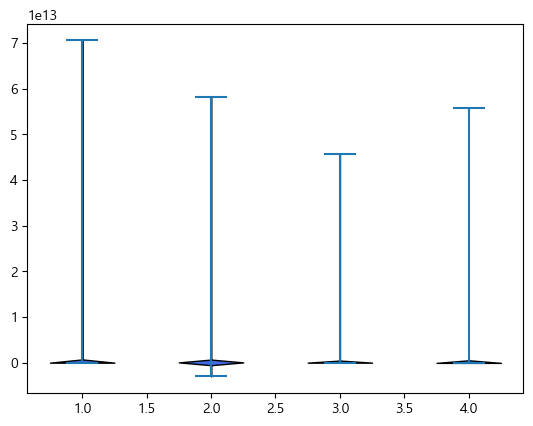

In [25]:
parts = plt.violinplot([gaap['자산'], gaap['자본'], gaap['부채'], gaap['매출액(영업수익)']])
for pc in parts['bodies']:
    pc.set_facecolor('royalblue')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
plt.show()

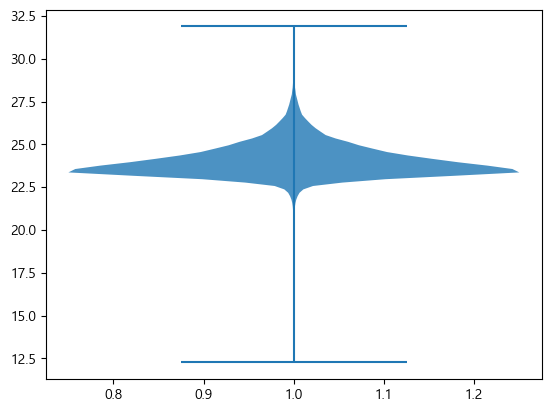

In [26]:
parts = plt.violinplot([np.log(gaap.loc[gaap['자산']>0,'자산'])])
for pc in parts['bodies']:
    pc.set_alpha(0.8)
plt.show()

In [27]:
# 재무데이터 중 0 이하 값 확인
l = []
for col in gaap.columns[5 : ] :
    c1 = gaap.loc[gaap[col] == 0 , col].count()
    c2 = len(gaap.loc[gaap[col] == 0, '거래소코드'].unique())
    c3 = gaap.loc[gaap[col] < 0, col].count()
    c4 = len(gaap.loc[gaap[col] < 0, '거래소코드'].unique())
    x = {'컬럼명' : col, '값 0 데이터 수' : c1, '값 0 회사 수' : c2, '값 음수 데이터 수' : c3, '값 음수 회사 수' : c4}
    l.append(x)

zero_data = pd.DataFrame(l)
zero_data

,컬럼명,값 0 데이터 수,값 0 회사 수,값 음수 데이터 수,값 음수 회사 수
0,종업원,33798,11919,0,0
1,자산,2,2,1,1
2,유동자산,7,7,1,1
3,비유동자산,3094,1752,1,1
4,유형자산,15975,5869,2,2
5,재고자산,52625,16015,1,1
6,매출채권,40649,14674,3,3
7,자본,8,5,30106,13304
8,자본금,24,9,0,0
9,자본잉여금,155168,37927,668,252


In [28]:
# 중간저장
gaap.to_csv('../data/외감_2015_2023_nonnull.csv', index=False)

In [29]:
# 1% 윈저라이징
for col in gaap.columns[5 : ] :
    gaap.loc[gaap[col] >= gaap[col].quantile(0.995) , col] = gaap[col].quantile(0.995)
    gaap.loc[gaap[col] <= gaap[col].quantile(0.005), col] = gaap[col].quantile(0.005)

In [30]:
# 윈저라이징 후 기초통계량 확인
gaap.describe()

,거래소코드,산업코드,종업원,자산,유동자산,비유동자산,유형자산,재고자산,매출채권,자본,...,영업외비용,법인세비용차감전(계속사업)손익,(계속사업손익)법인세비용,당기순이익(순손실),기초자본금,영업활동으로 인한 현금흐름,투자활동으로 인한 현금흐름,재무활동으로 인한 현금흐름,이자비용,차입금
count,211231.000000,211231.000000,211231.000000,2.112310e+05,2.112310e+05,2.112310e+05,2.112310e+05,2.112310e+05,2.112310e+05,2.112310e+05,...,2.112310e+05,2.112310e+05,2.112310e+05,2.112310e+05,2.112310e+05,2.112310e+05,2.112310e+05,2.112310e+05,2.112310e+05,2.112310e+05
mean,69384.788478,73746.098324,60.067968,5.507121e+10,2.212579e+10,3.210563e+10,1.981337e+10,8.028671e+09,5.673107e+09,1.721173e+10,...,1.943939e+09,1.130182e+09,3.863236e+08,7.518778e+08,3.713028e+09,9.578516e+08,-3.388830e+09,2.820068e+09,9.449294e+08,2.114326e+10
std,26005.067549,43950.859499,134.259885,1.265015e+11,4.985383e+10,9.032807e+10,5.261131e+10,2.301841e+10,1.488300e+10,5.405343e+10,...,5.707126e+09,8.649515e+09,1.482261e+09,7.530715e+09,1.336343e+10,1.351551e+10,1.251303e+10,1.648109e+10,2.518043e+09,4.556682e+10
min,10000.000000,10100.000000,0.000000,3.261449e+09,2.491650e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.008350e+10,...,0.000000e+00,-3.568972e+10,-2.240337e+09,-3.518897e+10,0.000000e+00,-7.491749e+10,-1.186550e+11,-6.626495e+10,0.000000e+00,1.000000e+09
25%,52225.500000,32602.000000,2.000000,1.419419e+10,3.723413e+09,5.503946e+09,1.388742e+09,5.265000e+05,6.810600e+07,1.407715e+09,...,2.568650e+08,-4.712040e+08,0.000000e+00,-4.838260e+08,3.000000e+08,-7.202645e+08,-2.797734e+09,-8.734640e+08,1.536835e+08,4.965360e+09
50%,72798.000000,64102.000000,20.000000,2.206643e+10,8.848391e+09,1.149192e+10,8.136405e+09,1.323608e+09,1.552948e+09,5.614097e+09,...,5.341360e+08,2.670940e+08,1.638900e+07,2.216890e+08,7.000000e+08,4.458230e+08,-5.257450e+08,1.650000e+08,3.200340e+08,8.972414e+09
75%,89115.000000,126801.000000,61.000000,4.363958e+10,1.906705e+10,2.304620e+10,1.646518e+10,5.858915e+09,4.832730e+09,1.399460e+10,...,1.332632e+09,1.531234e+09,2.378315e+08,1.282396e+09,2.000000e+09,2.216226e+09,0.000000e+00,2.850244e+09,7.130460e+08,1.793617e+10
max,116714.000000,209801.000000,1229.000000,1.228907e+12,4.636901e+11,8.992078e+11,5.284056e+11,2.110858e+11,1.391791e+11,5.310694e+11,...,5.737566e+10,7.290682e+10,1.471498e+10,6.047812e+10,1.335504e+11,1.023056e+11,2.348279e+10,1.329787e+11,2.543876e+10,4.260672e+11


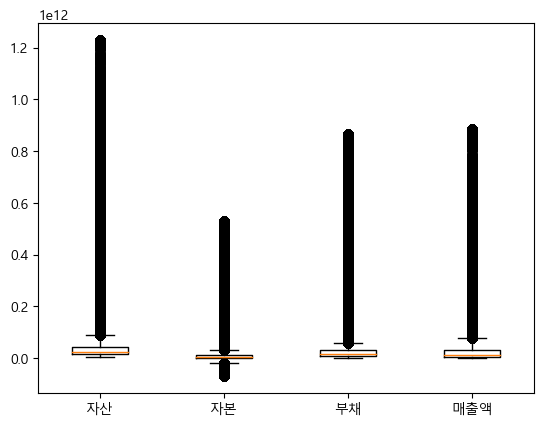

In [31]:
plt.rc('font', family = 'Malgun Gothic')
plt.boxplot([gaap['자산'], gaap['자본'], gaap['부채'], gaap['매출액(영업수익)']], labels = ['자산', '자본', '부채', '매출액'])
plt.show()

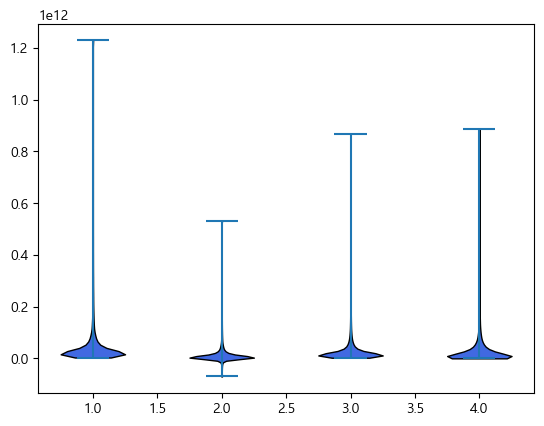

In [32]:
parts = plt.violinplot([gaap['자산'], gaap['자본'], gaap['부채'], gaap['매출액(영업수익)']])
for pc in parts['bodies']:
    pc.set_facecolor('royalblue')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
plt.show()

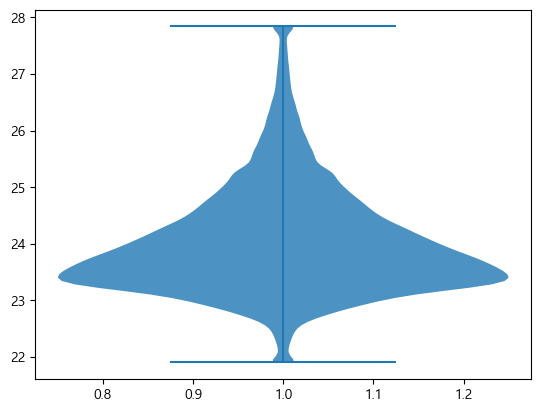

In [34]:
parts = plt.violinplot([np.log(gaap.loc[gaap['자산']>0,'자산'])])
for pc in parts['bodies']:
    pc.set_alpha(0.8)
plt.show()

In [36]:
# 재무데이터 중 0 이하 값 확인
l = []
for col in gaap.columns[6 : ] :
    c1 = gaap.loc[gaap[col] == 0 , col].count()
    c2 = len(gaap.loc[gaap[col] == 0, '거래소코드'].unique())
    c3 = gaap.loc[gaap[col] < 0, col].count()
    c4 = len(gaap.loc[gaap[col] < 0, '거래소코드'].unique())
    x = {'컬럼명' : col, '값 0 데이터 수' : c1, '값 0 회사 수' : c2, '값 음수 데이터 수' : c3, '값 음수 회사 수' : c4}
    l.append(x)

zero_data = pd.DataFrame(l)
zero_data

,컬럼명,값 0 데이터 수,값 0 회사 수,값 음수 데이터 수,값 음수 회사 수
0,자산,0,0,0,0
1,유동자산,0,0,0,0
2,비유동자산,3095,1753,0,0
3,유형자산,15977,5870,0,0
4,재고자산,52626,16015,0,0
5,매출채권,40652,14676,0,0
6,자본,8,5,30106,13304
7,자본금,0,0,0,0
8,자본잉여금,155836,38056,0,0
9,기타포괄손익누계액,138989,38748,11883,4348


In [37]:
# 파생변수 생성
gaap['매출총이익률'] = ((gaap['매출액(영업수익)'] - gaap['매출원가'])/(gaap['매출액(영업수익)'])) * 100
gaap['영업이익률'] = ((gaap['영업이익(손실)'])/(gaap['매출액(영업수익)'])) * 100
gaap['순이익률'] = ((gaap['당기순이익(순손실)'])/(gaap['매출액(영업수익)'])) * 100
gaap['부채비율'] = ((gaap['부채'])/(gaap['자본'])) * 100
gaap['유동부채비율'] = ((gaap['유동부채'])/(gaap['자본'])) * 100
gaap['비유동부채비율'] = ((gaap['비유동부채'])/(gaap['자본'])) * 100
gaap['유동비율'] = ((gaap['유동자산'])/(gaap['유동부채'])) * 100
gaap['이자보상배율'] = (gaap['영업이익(손실)'])/(gaap['이자비용'])
gaap['금융비용부담률'] = ((gaap['이자비용'])/(gaap['매출액(영업수익)'])) * 100
gaap['자본유보율'] = ((gaap['자본잉여금'] + gaap['이익잉여금'])/(gaap['자본금'])) * 100
gaap['자본잠식률'] = ((gaap['자본금'] - gaap['자본'])/gaap['자본금']) * 100

In [38]:
gaap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211231 entries, 0 to 274429
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   회사명               211231 non-null  object 
 1   거래소코드             211231 non-null  int64  
 2   회계년도              211231 non-null  object 
 3   산업코드              211231 non-null  int64  
 4   산업명               211231 non-null  object 
 5   종업원               211231 non-null  int64  
 6   자산                211231 non-null  float64
 7   유동자산              211231 non-null  float64
 8   비유동자산             211231 non-null  float64
 9   유형자산              211231 non-null  float64
 10  재고자산              211231 non-null  float64
 11  매출채권              211231 non-null  float64
 12  자본                211231 non-null  float64
 13  자본금               211231 non-null  float64
 14  자본잉여금             211231 non-null  float64
 15  기타포괄손익누계액         211231 non-null  float64
 16  이익잉여금             211231 

In [39]:
# 파생변수 중 음/양 무한대 값을 무한대 제외한 min/max로 치환
for col in gaap.columns[38 : ] :
    gaap.loc[gaap[col].isin([np.inf]), col] = gaap.loc[~gaap[col].isin([np.inf, -np.inf]), col].max()
    gaap.loc[gaap[col].isin([-np.inf]), col] = gaap.loc[~gaap[col].isin([np.inf, -np.inf]), col].min()

In [40]:
# 분모, 분자가 전부 0이어서 nan이 된 파생변수 0으로 치환
gaap.iloc[ : , 38 : ].fillna(0, inplace=True)

In [41]:
# 파생변수 통계량 확인
gaap.iloc[ : , 38 : ].describe()

,매출총이익률,영업이익률,순이익률,부채비율,유동부채비율,비유동부채비율,유동비율,이자보상배율,금융비용부담률,자본유보율,자본잠식률
count,196648.000000,2.110110e+05,2.111390e+05,2.112310e+05,2.112310e+05,2.112230e+05,211231.000000,2.110460e+05,2.076120e+05,2.112310e+05,2.112310e+05
mean,-739.579844,-3.755716e+06,-6.900501e+06,1.091454e+05,3.378482e+04,1.339436e+04,416.872639,6.366879e+04,1.994939e+06,1.281673e+03,-1.804166e+03
std,24802.384641,1.380848e+07,2.685275e+07,1.563304e+07,4.913871e+06,5.218892e+06,5803.803982,9.702374e+05,8.372921e+06,3.984690e+04,3.948625e+04
min,-807934.047462,-5.452925e+07,-1.109482e+08,-1.922670e+08,-1.147431e+08,-1.216624e+08,0.006125,-1.269013e+06,0.000000e+00,-4.730468e+06,-6.096027e+06
25%,10.804266,-4.627873e+00,-9.331912e+00,6.117479e+01,3.029180e+01,3.638862e+00,51.988597,-5.322850e-01,7.741310e-01,-2.532974e+01,-1.836461e+03
50%,20.731709,3.175651e+00,1.414562e+00,1.721655e+02,9.741087e+01,3.425649e+01,101.058006,1.366078e+00,2.274663e+00,3.386505e+02,-4.600956e+02
75%,45.655576,9.893597e+00,6.412585e+00,4.033740e+02,2.275851e+02,1.286879e+02,166.726865,4.933363e+00,1.086142e+01,1.590560e+03,-6.521750e-01
max,100.000000,5.604119e+03,3.878590e+06,2.373601e+09,7.376502e+08,2.367920e+09,920575.307933,8.989317e+06,3.714135e+07,6.096111e+06,2.336217e+06


In [42]:
# 데이터 저장
gaap.to_csv('../data/외감_2015_2023_1b.csv', index=False)